# Example of calculation of a power curve for month averaged wind speed values assuming a Rayleigh distribution



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)
import GenericWindTurbinePowerCurve as GWTPC

## The Weibull and Rayleigh distributions

### Definitions
The Weibull distribution is defined as:

$f_w(v)= (\frac{k}{c})(\frac{v}{c})^{k-1}.exp[-(\frac{v}{c})^k]$

The mean of the Weibull distribution is given by:

$\mu=c \Gamma(\frac{1}{k}+1)$

where $\Gamma()$ is the Gamma function.

The Rayleight distribution, which is a special case of Weibull distribution with a fixed shape parameter value k=2, is defined by:

$f_r(v)= \frac{\pi.v}{2.v_{m}^{2}}.exp[-\frac{\pi}{4}.(\frac{v}{v_m})^2]$

where $v_m$ is the mean of the distribution.

In [14]:
def f_weibull(vws,k,c):
    fw=(k/c)*(vws/c)**(k-1)*np.exp(-(vws/c)**k)
    return fw/np.sum(fw)

def f_rayleigh(vws,vm):
    fr=np.pi*vws/(2*vm**2)*np.exp(-np.pi/4*(vws/vm)**2)
    return fr/np.sum(fr)

### Comparison of the two distributions

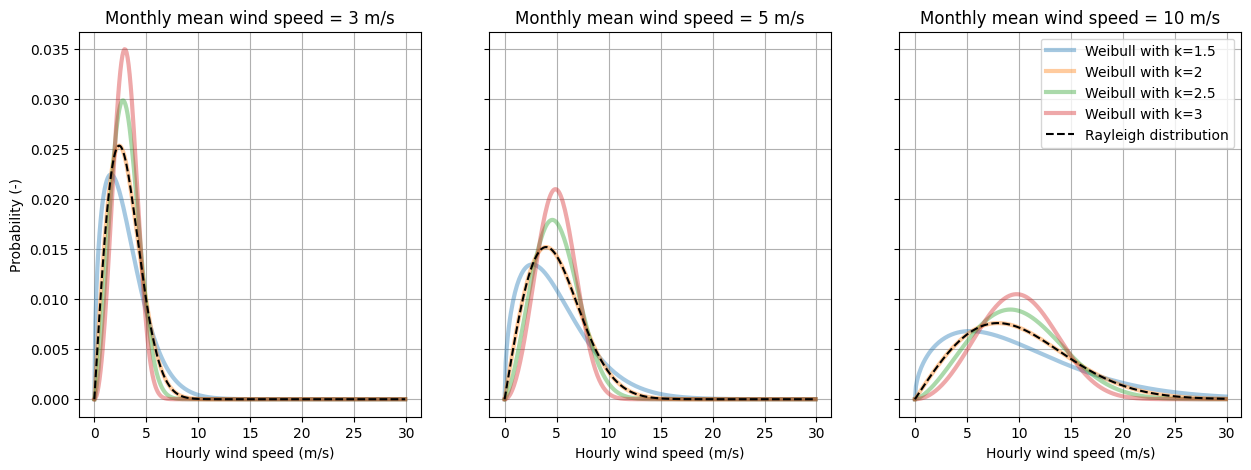

In [74]:
vws=np.arange(0,30,0.1)


v_m=[3,5,10]
v_k=[1.5,2,2.5,3]
vm=5


fig,axs=plt.subplots(1,len(v_m),figsize=[15,5],sharey=True)
for i_v,vavg in enumerate(v_m):
    
    for ik,k in enumerate(v_k):
        
        c=vavg/math.gamma(1/k+1)
        axs[i_v].plot(vws,f_weibull(vws,k,c),lw=3,alpha=0.4,label='Weibull with k={}'.format(k))
                  
    axs[i_v].plot(vws,f_rayleigh(vws,vavg),'k--',label='Rayleigh distribution')
    axs[i_v].set_title('Monthly mean wind speed = {} m/s'.format(vavg))
    axs[i_v].grid(True)
    
    if i_v==0:
        axs[i_v].set_ylabel('Probability (-)')
    axs[i_v].set_xlabel('Hourly wind speed (m/s)')
axs[i_v].legend()

## Evaluation of a power curve using monthly averaged wind speed

### Calculation of the instantaneous power curve 

In [79]:
ws = np.arange(0.01,35,0.01)

Pwt_GWTPC_hourly=GWTPC.GenericWindTurbinePowerCurve(ws,Pnom=10000,Drotor=178.3,Vcutin=0,zhub=119,TI=0.1)


### Calculation of the monthly power curve assuming a Rayleigh distribution

In [ ]:
Pwt_GWTPC_monthly=np.ones(ws.shape)
for ii,vm in enumerate(ws):
    Pwt_GWTPC_monthly[ii]=np.sum(Pwt_GWTPC_hourly*f_rayleigh(ws,vm))

### Comparison of the hourly and monthly power curves

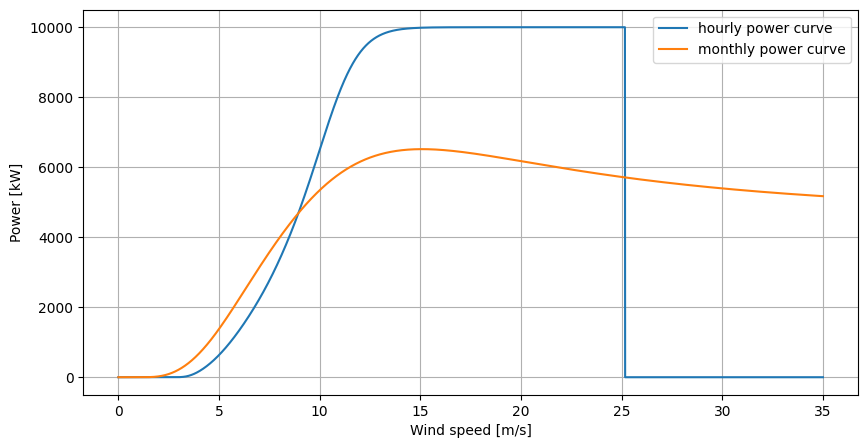

In [81]:
fig,axs=plt.subplots(1,1,figsize=[10,5],sharey=True)

axs.plot(ws, Pwt_GWTPC_hourly,'-', label='hourly power curve')
axs.legend(loc=1)
axs.set_xlabel('Wind speed [m/s]')
axs.set_ylabel('Power [kW]')
axs.grid(True)

axs.plot(ws, Pwt_GWTPC_monthly,'-', label='monthly power curve')
axs.legend(loc=1)
axs.set_xlabel('Wind speed [m/s]')
axs.set_ylabel('Power [kW]')
axs.grid(True)